In [1]:
# import dependencies
import pandas as pd
from apiKey import api_key
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
# pull data from csv
file_one = "Resources/highest_grossing_movies.csv"
df = pd.read_csv(file_one)

In [4]:
# create a list to loop through the top1000
titles = df['Title'].str[:-7].values.tolist()

In [5]:
# Interacting with the API
url = f'http://www.omdbapi.com/?apikey={api_key}&t='
# make a list to append json data
rt_movies_ls = [] # we'll turn this into a data frame
imdb_movies_ls = []
director_ls = []
actor_ls = []
title_ls = []
year_ls = []
rated_ls = []
length_ls = []

In [6]:
#
for title in titles[:500]:
    try:
        # access json data
        movie_json = requests.get(url + title).json()
        movie_ratings_rt = movie_json['Ratings'][1]['Value']
        movie_ratings_imdb = movie_json['imdbRating']
        movie_director = movie_json['Director']
        movie_actors = movie_json['Actors']
        movie_year = movie_json['Year']
        movie_rating = movie_json['Rated']
        movie_length = movie_json['Runtime']
        #append json to movie_ls list
        rt_movies_ls.append(movie_ratings_rt)
        imdb_movies_ls.append(movie_ratings_imdb)
        director_ls.append(movie_director)
        actor_ls.append(movie_actors)
        title_ls.append(title)
        year_ls.append(movie_year)
        rated_ls.append(movie_rating)
        length_ls.append(movie_length)
    except:
        pass

In [8]:
full_moviels_df = pd.DataFrame()
full_moviels_df['Title'] = title_ls
full_moviels_df['World Sales'] = df['World Sales (in $)']
full_moviels_df['Year Released'] = year_ls
full_moviels_df['Rotten Tomatoes Score'] = rt_movies_ls
full_moviels_df['IMDB Score'] = imdb_movies_ls
full_moviels_df['Director(s)'] = director_ls
full_moviels_df['Headlining Actor(s)'] = actor_ls
full_moviels_df['Studio'] = df['Distributor']
full_moviels_df['Runtime'] = length_ls
full_moviels_df['Rating'] = rated_ls
full_moviels_df['Genre'] = df['Genre']

In [9]:
full_moviels_df.to_csv("Output/Movie_Data.csv")

In [28]:
# pull data
#file = "Output/Movie_Data.csv"
#full_moviels_df = pd.read_csv(file)

# Director Sales, Actor Sales, and Studio Sales

In [10]:
# Bar Graphs on directors  sales, actors  sales,  studio sales,
dir_top_earning_df = pd.DataFrame()
dir_top_earning_df['Director(s)'] = full_moviels_df['Director(s)']
dir_top_earning_df['World Sales'] = full_moviels_df['World Sales']
dir_top_earning_df['Title'] = full_moviels_df['Title']
dir_top_earning_df['Year Released'] = full_moviels_df['Year Released']
dir_top_earning_df = dir_top_earning_df.sort_values(by=['World Sales'], ascending=False)

In [11]:
dir_ls = full_moviels_df["Director(s)"].unique()
#dir_ls
dir_df = full_moviels_df.groupby("Director(s)").agg(world_sales_sum=('World Sales','sum'),world_sales_mean=('World Sales','mean'),total_number_films=('Title','count'))    #{'World Sales':["sum","mean"], 'Title':"count"}
#dir_df = dir_df.reset_index()
dir_df = dir_df.rename(columns={'world_sales_sum':"World Sales Sum", 'world_sales_mean':"World Sales Mean", 'total_number_films':"Total Number of Films in Top 1000"})
dir_sum_df = dir_df.sort_values(by=['World Sales Sum'], ascending=False)
dir_mean_df = dir_df.sort_values(by=['World Sales Mean'], ascending=False)
dir_num_df = dir_df.sort_values(by=['Total Number of Films in Top 1000'], ascending=False)
#dir_df["Director Average World Gross per Film"] = (dir_df['World Sales']/dir_df['Title'])
#dir_df.head(10)
#dir_sum_df.dtypes
pd.options.display.float_format = '{:.2f}'.format

In [13]:
dir_sum_df = dir_sum_df.head(15)

In [14]:
dir_mean_df = dir_mean_df.head(15)

In [15]:
dir_num_df = dir_num_df.head(15)

In [16]:
dir_top_earning_df = dir_top_earning_df.head(15)

In [17]:
stu_top_earning_df = pd.DataFrame()
stu_top_earning_df['Studio'] = full_moviels_df['Studio']
stu_top_earning_df['World Sales'] = full_moviels_df['World Sales']
stu_top_earning_df['Title'] = full_moviels_df['Title']
stu_top_earning_df['Year Released'] = full_moviels_df['Year Released']
stu_top_earning_df = stu_top_earning_df.sort_values(by=['World Sales'], ascending=False)

In [18]:
stu_ls = full_moviels_df["Studio"].unique()

stu_df = full_moviels_df.groupby("Studio").agg(world_sales_sum=('World Sales','sum'),world_sales_mean=('World Sales','mean'),total_number_films=('Title','count'))    

stu_df = stu_df.rename(columns={'world_sales_sum':"World Sales Sum", 'world_sales_mean':"World Sales Mean", 'total_number_films':"Total Number of Films in Top 1000"})
stu_sum_df = stu_df.sort_values(by=['World Sales Sum'], ascending=False)
stu_mean_df = stu_df.sort_values(by=['World Sales Mean'], ascending=False)
stu_num_df = stu_df.sort_values(by=['Total Number of Films in Top 1000'], ascending=False)


pd.options.display.float_format = '{:.2f}'.format

In [19]:
stu_sum_df = stu_sum_df.head(15)

In [20]:
stu_mean_df = stu_mean_df.head(15)

In [21]:
stu_num_df = stu_num_df.head(15)

In [22]:
stu_top_earning_df = stu_top_earning_df.head(15)

In [23]:
actor_ls = []
hold_ls = []
ws_ls = []
filmindex = -1

hold_gross = full_moviels_df["World Sales"].values

for film in full_moviels_df["Headlining Actor(s)"]:
    actnum = 0
    filmindex = filmindex + 1
    hold_ls = film.split(", ")
    for actor in hold_ls:
        actor_ls.append(actor)
        actnum = actnum + 1
        for i in range (1, actnum):
            ws_ls.append(hold_gross[filmindex])
        
        
actor_df = pd.DataFrame()
actor_df['Actor Name'] = actor_ls
actor_df['World Sales for Film'] = ws_ls

In [24]:
act_df = actor_df.groupby("Actor Name").agg(world_sales_sum=('World Sales for Film','sum'),world_sales_mean=('World Sales for Film','mean'),total_number_films=('World Sales for Film','count'))    

act_df = act_df.rename(columns={'world_sales_sum':"World Sales Sum", 'world_sales_mean':"World Sales Mean", 'total_number_films':"Total Number of Films in Top 1000"})
act_sum_df = act_df.sort_values(by=['World Sales Sum'], ascending=False)
act_mean_df = act_df.sort_values(by=['World Sales Mean'], ascending=False)
act_num_df = act_df.sort_values(by=['Total Number of Films in Top 1000'], ascending=False)


pd.options.display.float_format = '{:.2f}'.format

In [25]:
act_sum_df = act_sum_df.head(15)

In [26]:
act_mean_df = act_mean_df.head(15)

In [27]:
act_num_df = act_num_df.head(15)

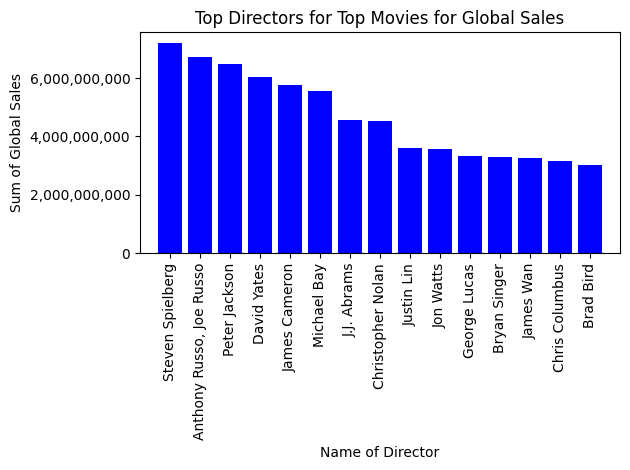

In [31]:
#dir_sum_df
dir_sum_ls = dir_sum_df.index.tolist()
dir_ws_ls = dir_sum_df["World Sales Sum"]
x_axis = np.arange(len(dir_ws_ls))

dir_sum_bar = plt.bar(x_axis, dir_ws_ls, color='b',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, dir_sum_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Director")
plt.ylabel("Sum of Global Sales")
plt.title("Top Directors for Top Movies for Global Sales")

plt.tight_layout()
plt.savefig("Output/dir_sumBars.png", bbox_inches="tight")
plt.show()

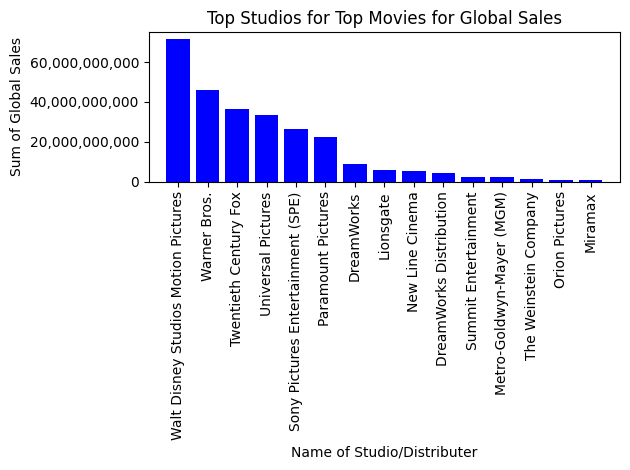

In [32]:
#stu_sum_df
stu_sum_bar = stu_sum_df

stu_sum_ls = stu_sum_df.index.tolist()
stu_ws_ls = stu_sum_df["World Sales Sum"]
x_axis = np.arange(len(stu_ws_ls))

stu_sum_bar = plt.bar(x_axis, stu_ws_ls, color='b',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, stu_sum_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Studio/Distributer")
plt.ylabel("Sum of Global Sales")
plt.title("Top Studios for Top Movies for Global Sales")

plt.tight_layout()
plt.savefig("Output/stu_sumBars.png", bbox_inches="tight")
plt.show()


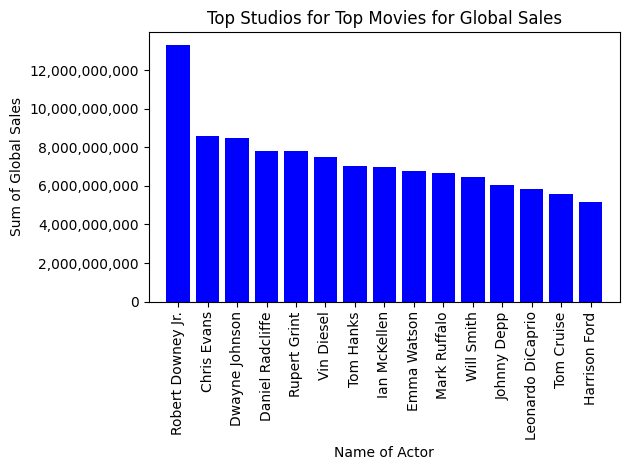

In [33]:
act_sum_bar = act_sum_df

act_sum_ls = act_sum_df.index.tolist()
act_ws_ls = act_sum_df["World Sales Sum"]
x_axis = np.arange(len(stu_ws_ls))

act_sum_bar = plt.bar(x_axis, act_ws_ls, color='b',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, act_sum_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Actor")
plt.ylabel("Sum of Global Sales")
plt.title("Top Studios for Top Movies for Global Sales")

plt.tight_layout()
plt.savefig("Output/act_sumBars.png", bbox_inches="tight")
plt.show()


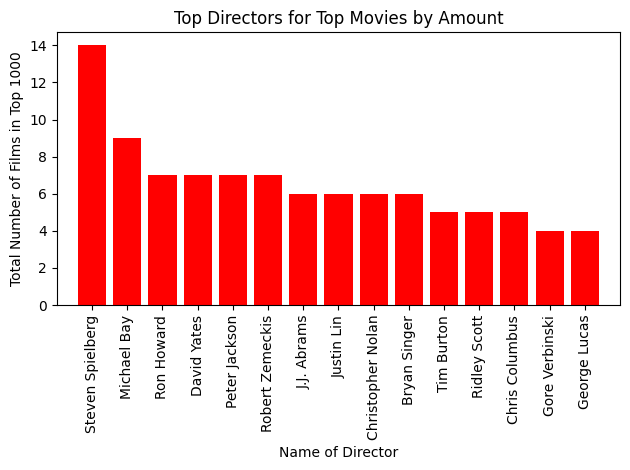

In [34]:
dir_num_ls = dir_num_df.index.tolist()
dir_wsa_ls = dir_num_df["Total Number of Films in Top 1000"]
x_axis = np.arange(len(dir_wsa_ls))

dir_num_bar = plt.bar(x_axis, dir_wsa_ls, color='r',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, dir_num_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Director")
plt.ylabel("Total Number of Films in Top 1000")
plt.title("Top Directors for Top Movies by Amount")

plt.tight_layout()
plt.savefig("Output/dir_numBars.png", bbox_inches="tight")
plt.show()


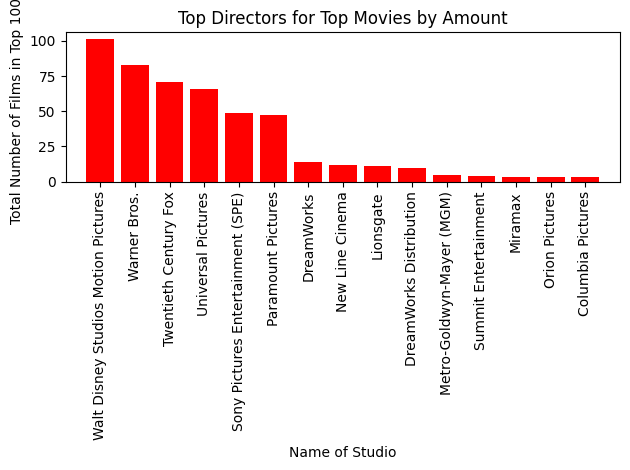

In [35]:
stu_num_ls = stu_num_df.index.tolist()
stu_wsa_ls = stu_num_df["Total Number of Films in Top 1000"]
x_axis = np.arange(len(stu_wsa_ls))

stu_num_bar = plt.bar(x_axis, stu_wsa_ls, color='r',alpha=1,align="center")
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, stu_num_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Studio")
plt.ylabel("Total Number of Films in Top 1000")
plt.title("Top Directors for Top Movies by Amount")

plt.tight_layout()
plt.savefig("Output/stu_numBars.png", bbox_inches="tight")
plt.show()


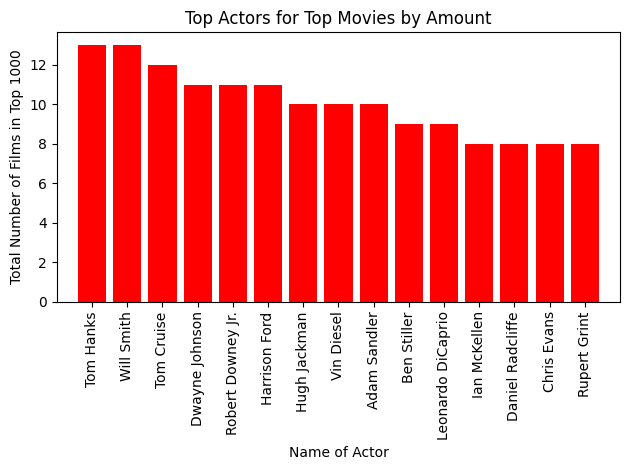

In [36]:
act_num_ls = act_num_df.index.tolist()
act_wsa_ls = act_num_df["Total Number of Films in Top 1000"]
x_axis = np.arange(len(act_wsa_ls))

act_num_bar = plt.bar(x_axis, act_wsa_ls, color='r',alpha=1,align="center")
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, act_num_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Actor")
plt.ylabel("Total Number of Films in Top 1000")
plt.title("Top Actors for Top Movies by Amount")

plt.tight_layout()
plt.savefig("Output/act_numBars.png", bbox_inches="tight")
plt.show()


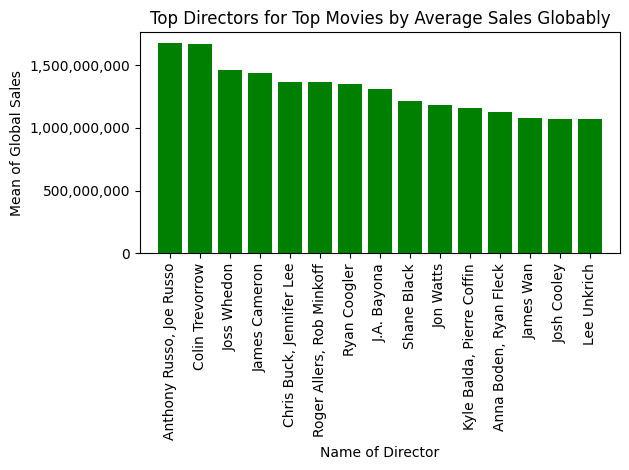

In [37]:
dir_mean_ls = dir_mean_df.index.tolist()
dir_wsm_ls = dir_mean_df["World Sales Mean"]
x_axis = np.arange(len(dir_wsm_ls))

dir_mean_bar = plt.bar(x_axis, dir_wsm_ls, color='g',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, dir_mean_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Director")
plt.ylabel("Mean of Global Sales")
plt.title("Top Directors for Top Movies by Average Sales Globably")

plt.tight_layout()
plt.savefig("Output/dir_meanBars.png", bbox_inches="tight")
plt.show()


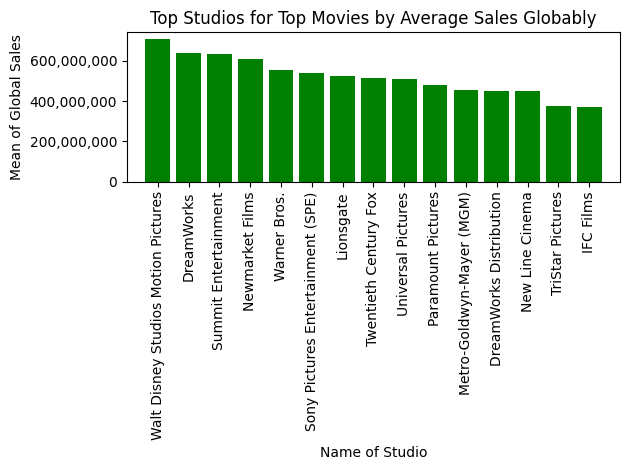

In [38]:
stu_mean_ls = stu_mean_df.index.tolist()
stu_wsm_ls = stu_mean_df["World Sales Mean"]
x_axis = np.arange(len(stu_wsm_ls))

stu_mean_bar = plt.bar(x_axis, stu_wsm_ls, color='g',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, stu_mean_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Studio")
plt.ylabel("Mean of Global Sales")
plt.title("Top Studios for Top Movies by Average Sales Globably")

plt.tight_layout()
plt.savefig("Output/stu_meanBars.png", bbox_inches="tight")
plt.show()


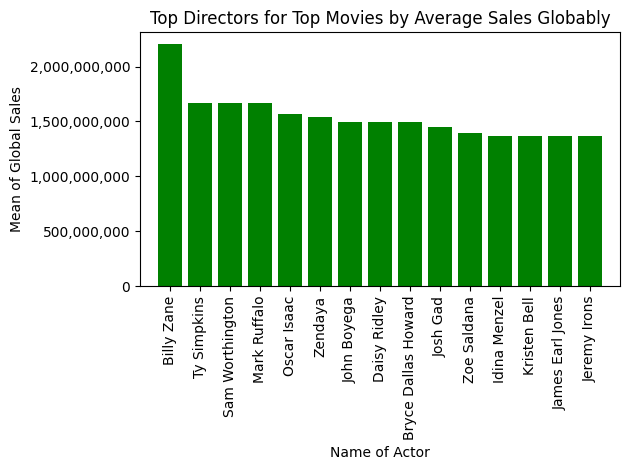

In [39]:
act_mean_ls = act_mean_df.index.tolist()
act_wsm_ls = act_mean_df["World Sales Mean"]
x_axis = np.arange(len(act_wsm_ls))

act_mean_bar = plt.bar(x_axis, act_wsm_ls, color='g',alpha=1,align="center")
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
ticks_loc = [value for value in x_axis]
plt.xticks(ticks_loc, act_mean_ls)
plt.xticks(rotation=90)
plt.xlim(-1,len(x_axis))

plt.xlabel("Name of Actor")
plt.ylabel("Mean of Global Sales")
plt.title("Top Directors for Top Movies by Average Sales Globably")

plt.tight_layout()
plt.savefig("Output/act_meanBars.png", bbox_inches="tight")
plt.show()


# Genre Percentage in Top Grossing

In [40]:
# Retrieve genre column
genres = full_moviels_df['Genre'] 

In [41]:
# Retrieve each genre
genre_ls = []
hold_ls = []
for genre in genres:
    hold_ls = genre.split(", ")
    for genre in hold_ls:
        genre_ls.append(genre)

In [42]:
# Clean data
genre1 = pd.DataFrame(genre_ls)
final_genre = genre1[0].str.replace('\W', '', regex=True)

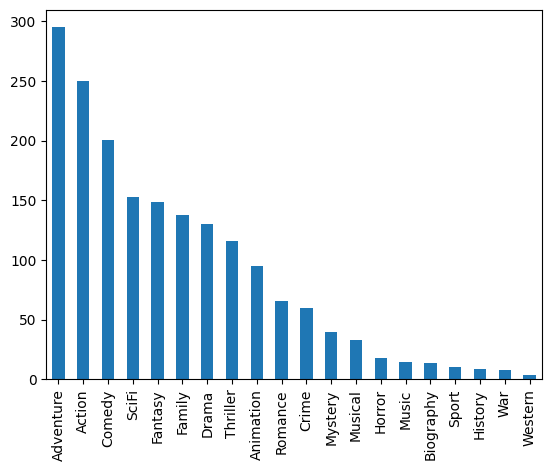

In [43]:
# bar chart of Genre Percentage in top grossing
genre = final_genre.value_counts()
genre.plot.bar()
plt.savefig("Output/barchartgenre.png")
plt.show()

# Genre Performance Over the Past Ten Years

In [44]:
#pull sales, year, and genre columns
genre_df = full_moviels_df[['World Sales', 'Year Released', 'Genre']]

In [45]:
# seperate genres into new columns

genre_df = pd.concat([genre_df, genre_df['Genre'].str.split(',', expand=True)], axis=1)
genre_df = genre_df.drop(columns = 'Genre')
#RM

In [48]:
# Pull data from 2009 to 2019
genre_df = genre_df.loc[genre_df['Year Released'] > 2008]
genre_df = genre_df.loc[genre_df['Year Released'] < 2020]

In [47]:
# label new columns

genres = {genre_df.columns[2]: 'Genre_1', 
          genre_df.columns[3]: 'Genre_2',
          genre_df.columns[4]: 'Genre_3',
          genre_df.columns[5]: 'Genre_4',
          genre_df.columns[6]: 'Genre_5',
          genre_df.columns[7]: 'Genre_6',
          genre_df.columns[8]: 'Genre_7',
          genre_df.columns[9]: 'Genre_8'
         }
genre_df = genre_df.rename(columns=genres)

In [54]:
# revmove special characters from genre cells

genre_df['Genre_1'] = genre_df['Genre_1'].str.replace('\W', '', regex=True)
genre_df['Genre_2'] = genre_df['Genre_2'].str.replace('\W', '', regex=True)
genre_df['Genre_3'] = genre_df['Genre_3'].str.replace('\W', '', regex=True)
genre_df['Genre_4'] = genre_df['Genre_4'].str.replace('\W', '', regex=True)
genre_df['Genre_5'] = genre_df['Genre_5'].str.replace('\W', '', regex=True)
genre_df['Genre_6'] = genre_df['Genre_6'].str.replace('\W', '', regex=True)
genre_df['Genre_7'] = genre_df['Genre_7'].str.replace('\W', '', regex=True)
genre_df['Genre_8'] = genre_df['Genre_8'].str.replace('\W', '', regex=True)

In [55]:
# sum the sales by year and genre
genre_1 = genre_df.groupby(['Year Released', 'Genre_1']).agg({'World Sales': 'sum'})
genre_1 = genre_1.reset_index()
genre_1 = genre_1.rename(columns={'Genre_1':'Genre'})

genre_2 = genre_df.groupby(['Year Released', 'Genre_2']).agg({'World Sales': 'sum'})
genre_2 = genre_2.reset_index()
genre_2 = genre_2.rename(columns={'Genre_2':'Genre'})

genre_3 = genre_df.groupby(['Year Released', 'Genre_3']).agg({'World Sales': 'sum'})
genre_3 = genre_3.reset_index()
genre_3 = genre_3.rename(columns={'Genre_3':'Genre'})

genre_4 = genre_df.groupby(['Year Released', 'Genre_4']).agg({'World Sales': 'sum'})
genre_4 = genre_4.reset_index()
genre_4 = genre_4.rename(columns={'Genre_4':'Genre'})

genre_5 = genre_df.groupby(['Year Released', 'Genre_5']).agg({'World Sales': 'sum'})
genre_5 = genre_5.reset_index()
genre_5 = genre_5.rename(columns={'Genre_5':'Genre'})

genre_6 = genre_df.groupby(['Year Released', 'Genre_6']).agg({'World Sales': 'sum'})
genre_6 = genre_6.reset_index()
genre_6 = genre_6.rename(columns={'Genre_6':'Genre'})

genre_7 = genre_df.groupby(['Year Released', 'Genre_7']).agg({'World Sales': 'sum'})
genre_7 = genre_7.reset_index()
genre_7 = genre_7.rename(columns={'Genre_7':'Genre'})

genre_8 = genre_df.groupby(['Year Released', 'Genre_8']).agg({'World Sales': 'sum'})
genre_8 = genre_8.reset_index()
genre_8 = genre_8.rename(columns={'Genre_8':'Genre'})

# reset index in order to rename genre columns for merging all info
final_genre = pd.concat([genre_1,
                         genre_2,
                         genre_3,
                         genre_4,
                         genre_5,
                         genre_6,
                         genre_7,
                         genre_8]).groupby(['Year Released','Genre']).sum().reset_index()

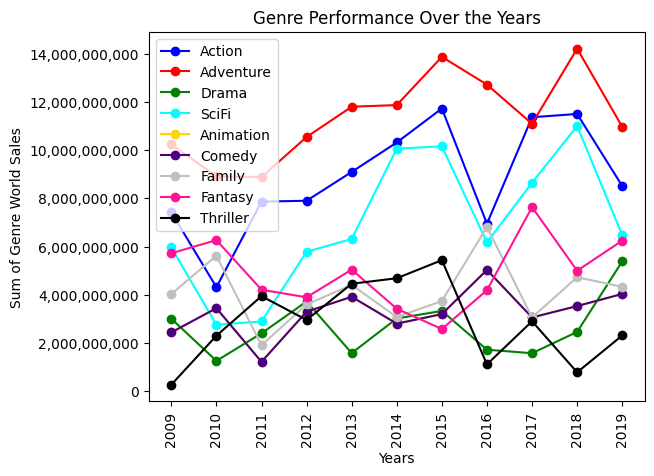

In [73]:
# Retrieve Action world sales
final_action = final_genre.loc[final_genre['Genre'] == 'Action']
action_y_values = final_action['World Sales']
x_values = final_action['Year Released']

# Adventure world sales
final_adventure = final_genre.loc[final_genre['Genre'] == 'Adventure']
adventure_y_values = final_adventure['World Sales']

#Drama world sales
final_drama = final_genre.loc[final_genre['Genre'] == 'Drama']
drama_y_values = final_drama['World Sales']

#SciFi world sales
final_scifi = final_genre.loc[final_genre['Genre'] == 'SciFi']
scifi_y_values = final_scifi['World Sales']

# Animation world sales
final_animation = final_genre.loc[final_genre['Genre'] == 'Animation']
animation_y_values = final_animation['World Sales']

# Comedy world sales
final_comedy = final_genre.loc[final_genre['Genre'] == 'Comedy']
comedy_y_values = final_comedy['World Sales']

# Family world sales
final_family = final_genre.loc[final_genre['Genre'] == 'Family']
family_y_values = final_family['World Sales']

# Fantasy world sales
final_fantasy = final_genre.loc[final_genre['Genre'] == 'Fantasy']
fantasy_y_values = final_fantasy['World Sales']

# Thriller world sales
final_thriller = final_genre.loc[final_genre['Genre'] == 'Thriller']
thriller_y_values = final_thriller['World Sales']


#plot lines
action_plot = plt.plot(x_values, action_y_values, marker ='o', color='blue', label="Action")
adventure_y_plot = plt.plot(x_values, adventure_y_values, marker ='o', color='red', label="Adventure")
drama_y_plot = plt.plot(x_values, drama_y_values, marker ='o', color='green', label="Drama")
scifi_yplot = plt.plot(x_values, scifi_y_values, marker ='o', color='cyan', label="SciFi")
animation_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='gold', label="Animation")
comedy_yplot = plt.plot(x_values, animation_y_values, marker ='o', color='indigo', label="Comedy")
family_yplot = plt.plot(x_values, family_y_values, marker ='o', color='silver', label="Family")
fantasy_yplot = plt.plot(x_values, fantasy_y_values, marker ='o', color='deeppink', label="Fantasy")
thriller_yplot = plt.plot(x_values, thriller_y_values, marker ='o', color='black', label="Thriller")

# creating plot
plt.legend(loc="upper left") # plot legend
plt.ticklabel_format(style='plain') # remove scientic notation
# titles
plt.title("Genre Performance Over the Years")
plt.xlabel("Years")
plt.ylabel("Sum of Genre World Sales")
plt.xticks(x_values, rotation=90) # show all x values and rotate
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
plt.savefig("Output/genre.png", bbox_inches='tight')
plt.show()

# Movie Rating vs Sales

In [49]:
rate_count = full_moviels_df["Rating"].value_counts()

In [50]:
#DataFrame for Total sales from a rating
rated_and_sales = full_moviels_df.set_index(['Rating'])['World Sales']
rate_type_avg_sales = full_moviels_df.groupby(["Rating"]).mean()["World Sales"]
rate_type_sales_overall = full_moviels_df.groupby(["Rating"]).sum()["World Sales"]



type_summary=pd.DataFrame({
                          'Total Sales Per Type':rate_type_sales_overall,
                            })
type_summary

,Total Sales Per Type
Rating,
18+,354825435
Approved,184925486
G,16917497010
PG,67379279430
PG-13,157811622067
R,31030184041


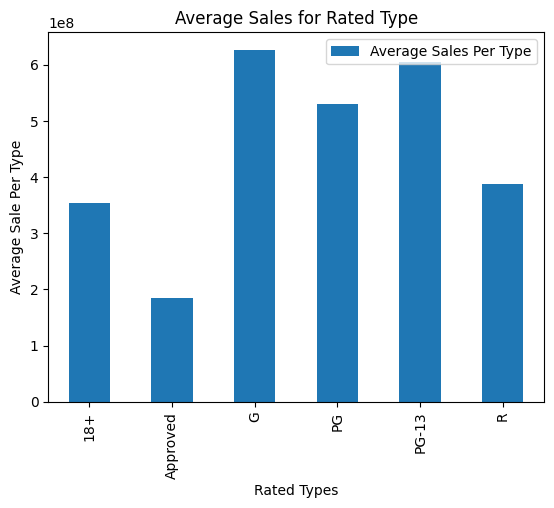

In [51]:
#Bar chart for Average sales per Rating type
rated_and_sales_avg = full_moviels_df.set_index(['Rating'])['World Sales']


avg_summary =pd.DataFrame({"Average Sales Per Type":rate_type_avg_sales})

Average_summary=avg_summary.plot.bar()
plt.xlabel("Rated Types")
plt.ylabel("Average Sale Per Type")
plt.title("Average Sales for Rated Type")
plt.savefig("Output/salesperratedtype.png")

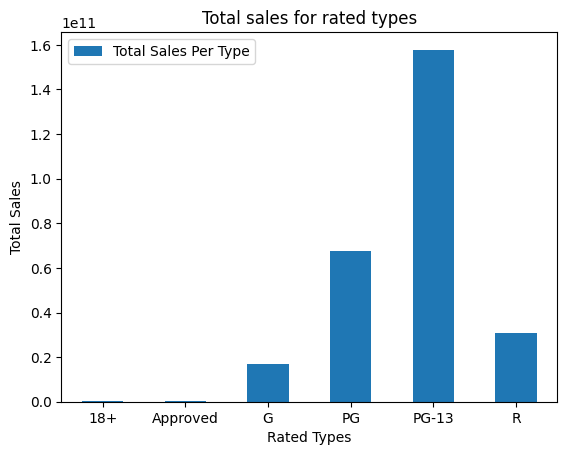

In [52]:
overall_sale_by_rate_type=type_summary.plot.bar()

plt.xlabel("Rated Types")
plt.ylabel("Total Sales")
plt.title("Total sales for rated types")
plt.xticks(rotation=360)
plt.savefig("Output/SalesOverall.png")

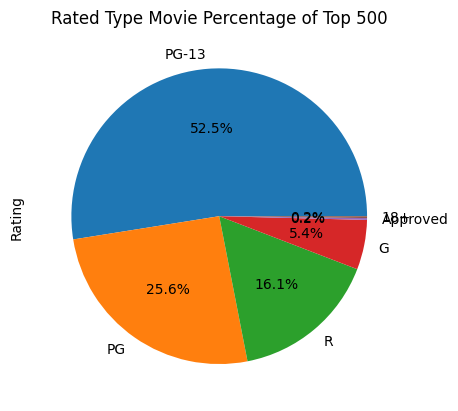

In [53]:
#pie chart for percentage of rated type in top 500 EP
plt.title("Rated Type Movie Percentage of Top 500")
rate_count.plot.pie(autopct= "%1.1f%%")


plt.savefig("Output/RatePercent500.png")
plt.show()

# Reception vs Sales

In [54]:
score_df = pd.read_csv("Output/Movie_Data.csv")

In [55]:
# Formatting with a function that calls a loop
# this one removes the percentage signs
# further, data types are inconsistent
def format_score(x):
    if '%' in x:# removes the percentage sign
        return x.split('%')[0]
    elif '/' in x:# this one was for those'XX/100'
        return x.split('/')[0]
    elif '–' in x:# the split one
        return x.split('–')[0] #the wierd one 
    elif x is None:
        return None

In [56]:
# Call the above formula, the idea for mapping and using lambda
# came from a previous tutoring session
score_df["Rotten Tomatoes Score"] = score_df["Rotten Tomatoes Score"].map(lambda x: format_score(x))
score_df["Rotten Tomatoes Score"] = pd.to_numeric(score_df["Rotten Tomatoes Score"])

In [57]:
# Formatting the IMDB scores
score_df['IMDB Score'] = score_df.apply(lambda x: x['IMDB Score'] * 10, axis=1)

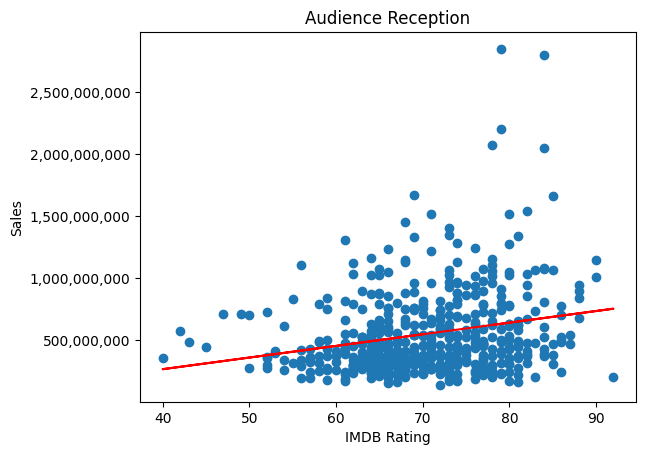

In [58]:
# sales (y value)
plt.scatter(score_df['IMDB Score'], score_df['World Sales'
                                ])
# line of regression
x_values = score_df['IMDB Score']
y_values = score_df['World Sales']
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


# Labels
plt.ylabel("Sales")
plt.xlabel("IMDB Rating")
plt.title('Audience Reception')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.savefig('Output/audience_score.pdf')

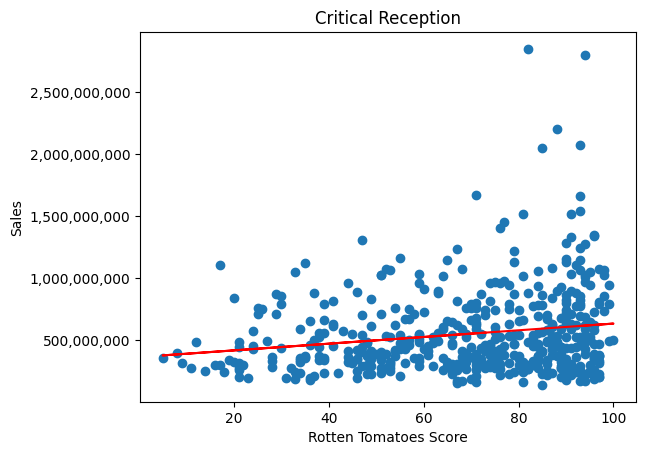

In [59]:
# isolate audience response (rotten Tomatoes)
# sales (y value)
plt.scatter(score_df['Rotten Tomatoes Score'], score_df['World Sales'
                                ])
# sales (y value)

# line of regression
x_values = score_df['Rotten Tomatoes Score']
y_values = score_df['World Sales']
plt.ticklabel_format(style='plain') # remove scientic notation
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) # add commas to yticks
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


# Labels
plt.ylabel("Sales")
plt.xlabel("Rotten Tomatoes Score")
plt.title('Critical Reception')
plt.savefig('Output/critical_score.pdf')